# Birth Rate Analysis

This is a another walk-thorugh of a data science project and going to be learning and walk slowly thorugh birth rate analysis, to understand what the user did and what steps he took to understand the data with his analysis.

In [1]:
# Data Walk-Thorugh

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data

births = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Birthrate-Analysis/refs/heads/master/births.csv')

print(births.head())

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [3]:
# Is there empty data?

births.isna().sum()

,0
year,0
month,0
day,480
gender,0
births,0


In [4]:
births[births['day'].isna()]

,year,month,day,gender,births
15067,1989,1,NaN,F,156749
15068,1989,1,NaN,M,164052
15069,1989,2,NaN,F,146710
15070,1989,2,NaN,M,154047
15071,1989,3,NaN,F,165889
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


So there is 480 empty values in the day section. The days are filled with NANs so we can fill it up with zeros.

In [5]:
# We can impute the empty days with zero.. and convert the day column as type integer

births['day'] = births['day'].fillna(0)

# Convert it to int

births['day'].astype(int)

,day
0,1
1,1
2,2
3,2
4,3
...,...
15542,0
15543,0
15544,0
15545,0


In [6]:
# Create A New Column called Decade
# Oh okay he got rid of the last digit and multiply it by 10 so that we
# Can get the decade values..
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births',index = 'decade',columns = 'gender', aggfunc = 'sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


We can see that male births outnumber female births in every decade. We can use plotting tools in Pandas to visualize the total number of births per year.

The pivot_table is a function used to reshape,summarize and aggregate data in a spreadsheet style format within Python.

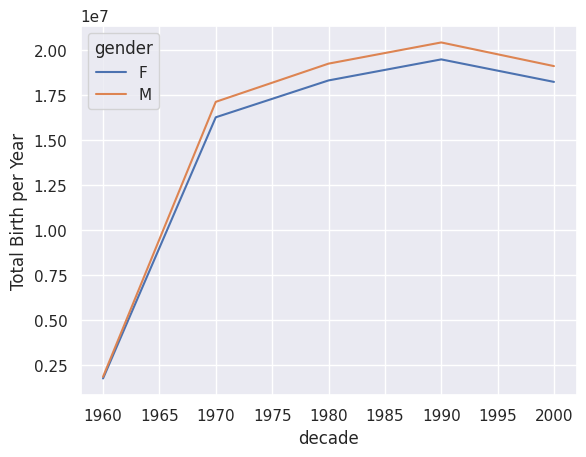

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# How does pivot table even work?
birth_decade = births.pivot_table('births', index = 'decade',columns = 'gender', aggfunc = 'sum')

birth_decade.plot()
plt.ylabel('Total Birth per Year')
plt.show()

In [8]:
birth_decade

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


# Further Exploration:

We must start cleaning the data a bit, removing outliers caused by mistyped dates or missing values. One easy way to remove all these all at once is to cut outliers,

There are a few interesting features we can pull out of this dataset using the Pandas tools.

In [9]:
import numpy as np

quartiles = np.percentile(births['births'], [25,50,75])
mu = quartiles[1]

sig = 0.74 * (quartiles[2] - quartiles[0])

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Guassian Distribution

The IQR represents the spread of the 50% interquartile range.

It quantifies the variability of the central range of the data, serving as a robust alternative to the standard deviation.

The IQR tells you the range where the middle half (50%) of your data falls in a normal distribution, providing a measure of spread less sensitive to extreme values (outliers) than the overall range.

We can use the `query()` method to filter out rows with births outside these values.

In [11]:
# Query the columns of a dataframe with a boolean expression...
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

# Made A DateTime Column..
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = '%Y%m%d')

# Made a dayofweek columns
births['dayofweek'] = births.index.dayofweek

In [12]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


Using this we can plot births by weekday for several decades:


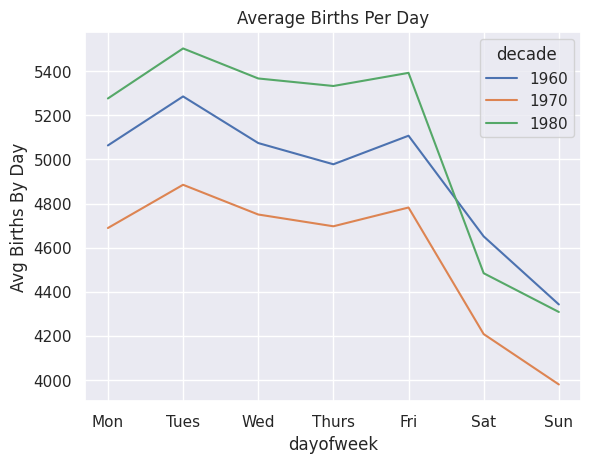

In [25]:
births.pivot_table('births', index = 'dayofweek',
                   columns = 'decade', aggfunc = 'mean').plot()

# Fix the visualization by explicitly setting the x-axis ticks before
# Applying the labels, which should resolve the warning.
plt.gca().set_xticks(np.arange(7))
plt.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.title('Average Births Per Day')
plt.ylabel('Avg Births By Day');
plt.show()

Another interesting view is to plot the mean number of births by the day of the year. Let's first group the data by month and day seperately:

In [17]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])

print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625


In [19]:
import datetime
# We use datetime.datetime
births_month.index = [datetime.datetime(2012,month,day)
for (month,day) in births_month.index]

It creates a `datetime` object for each day of the year. The year `2012` is used as a placeholder, allowing pandas to interpret the month and day correctly for plotting or time-series analysis purposes. This is useful for visualizing yearly trends without being influenced by specific year-to-year variations, effectively showing a `typical` year's pattern.

In [20]:
births_month

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
...,...
2012-12-27,4850.150
2012-12-28,5044.200
2012-12-29,5120.150
2012-12-30,5172.350


Focusing on the month and day only, we now have a time series reflecting the average # of births by date of the year. From this, we can use the plot method to plot the data. It reveals some interesting trends.

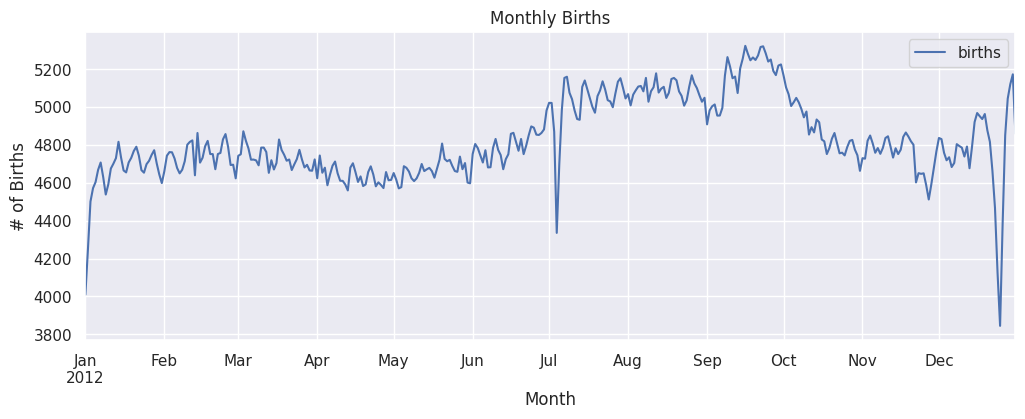

In [23]:
fig,ax = plt.subplots(figsize = (12,4))
births_month.plot(ax = ax)
ax.set_title('Monthly Births')
ax.set_xlabel('Month')
ax.set_ylabel('# of Births')
plt.show()

In [24]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


This is a really good notebook to better understand how to calculate sample statistics and cut off outliers for a more robust measurement of data-points.

# End